# 2) Do I have the right equations?

In [1]:
from IPython.display import display, Math
import sympy as sp

In [2]:
import numpy as np

## 2.1) KG with IC

In [3]:
# KG equation

#Define the symbols and functions
r = sp.symbols('r')
fa, ma, c, mu, G = sp.symbols('f_a m_a c mu G')
a = sp.Function('a')(r)
rho = sp.Function('rho')(r)
llambda = sp.Function('lambda')(r)
nu = sp.Function('nu')(r)

# Define the equation
KG = ma**2 * sp.exp(llambda) * sp.sin(a) + (c**2 * rho)/(mu*fa) * sp.exp(llambda) + \
           sp.diff(a, r) * (-2/r + 
           1/2  * sp.diff(llambda, r) - 
           1/2  * sp.diff(nu, r))
           

# Display the equation in LaTeX form
display_KG = sp.Eq(sp.diff(a, r, r), KG)
display_KG

Eq(Derivative(a(r), (r, 2)), c**2*rho(r)*exp(lambda(r))/(f_a*mu) + m_a**2*exp(lambda(r))*sin(a(r)) + (0.5*Derivative(lambda(r), r) - 0.5*Derivative(nu(r), r) - 2/r)*Derivative(a(r), r))

In [4]:
# initial condition
ri, a_c, rho_c, a_i= sp.symbols('r_i a_c rho_c a_i')

# Define the expression for a_ri
a_ri = a_c + (ri**2 * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / (6 * fa * mu)

# Display the expression
display_a_ri = sp.Eq(a_i,a_ri)
display_a_ri


Eq(a_i, a_c + r_i**2*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))/(6*f_a*mu))

## 2.2) TOV

In [5]:
# TOV
# Define additional symbols and functions needed for the new equation
P = sp.Function('P')(rho)  # Pressure as a function of r
dZetadXi = sp.Function('dZetadXi')(rho)  # Derivative of Zeta with respect to Xi

# Correcting the usage of rho and other functions
TOV = -(((fa / mu *  ((3 * P)  - (c**2 * rho) ) * sp.diff(a, r))) + ( (P + c**2 * rho) /2 * sp.diff(nu, r)))/sp.diff(P,rho)

# Display the new equation
display_TOV = sp.Eq(sp.diff(rho, r), TOV)
display_TOV

Eq(Derivative(rho(r), r), (-f_a*(-c**2*rho(r) + 3*P(rho(r)))*Derivative(a(r), r)/mu - (c**2*rho(r)/2 + P(rho(r))/2)*Derivative(nu(r), r))/Derivative(P(rho(r)), rho(r)))

In [6]:
# Define the symbols
rho_ri = sp.symbols('rho_ri')

# Define P as a function of rho_c
PP = sp.Function('P')(rho_c)

# Define the derivative of P with respect to rho at rho = rho_c
dP_drho_c = sp.diff(P, rho_c) 

# Define the complex expression for Rho[ri]
Rho_ri = rho_c - 1/(6 * mu * dP_drho_c) * ri**2 * (
    (4 * G * sp.pi * rho_c * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * PP)) / c**2 +
    (4 * G * sp.pi * PP * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * PP)) / c**4 +
    (c**2 * rho_c * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / mu -
    (3 * P * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / mu
)

# Display the expression
display_Rho_ri = sp.Eq(rho_ri, Rho_ri)
display_Rho_ri


Eq(rho_ri, zoo*r_i**2*(4*pi*G*rho_c*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))/c**2 + 4*pi*G*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))*P(rho_c)/c**4 + c**2*rho_c*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))/mu - 3*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))*P(rho(r))/mu) + rho_c)

## 2.3) Metric Potential

In [7]:
# metric potential
G = sp.symbols('G')  # Gravitational constant

# Define the new equation
metric_pot = -1/r + sp.exp(llambda)/r + (8 * sp.exp(llambda) * G * sp.pi * r * P)/c**4 - \
                 (8 * sp.exp(llambda) * fa * G * sp.pi * r * (-fa * ma**2 * mu * (-1 + sp.cos(a)) + \
                 c**2 * a * rho))/(c**4 * mu) + \
                 (4 * fa**2 * G * sp.pi * r * sp.diff(a, r)**2)/c**4

# Display the new equation
display_metric_pot = sp.Eq(sp.diff(nu, r),metric_pot)
display_metric_pot



Eq(Derivative(nu(r), r), 4*pi*G*f_a**2*r*Derivative(a(r), r)**2/c**4 - 8*pi*G*f_a*r*(c**2*a(r)*rho(r) - f_a*m_a**2*mu*(cos(a(r)) - 1))*exp(lambda(r))/(c**4*mu) + 8*pi*G*r*P(rho(r))*exp(lambda(r))/c**4 + exp(lambda(r))/r - 1/r)

In [8]:

# Define PP as a function of rho_c if it's not already defined
nu_c = sp.symbols('nu_c')  # Gravitational constant
nu_i = sp.symbols('nu_i')

# Define the expression for Nu[ri]
Nu_ri = nu_c + (4 * G * sp.pi * ri**2 * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * PP)) / (3 * c**4 * mu)

# Display the expression
display_Nu_ri = sp.Eq(nu_i,Nu_ri)
display_Nu_ri


Eq(nu_i, 4*pi*G*r_i**2*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))/(3*c**4*mu) + nu_c)

## 2.4) Mass Equation

In [9]:
# mass equation
mass_eq = 1/r - sp.exp(llambda)/r + (8 * sp.exp(llambda) * G * sp.pi * r * rho)/c**4 + \
                 (8 * sp.exp(llambda) * fa * G * sp.pi * r * (-fa * ma**2 * mu * (-1 + sp.cos(a)) + \
                 c**2 * a * rho))/(c**4 * mu) + \
                 (4 * fa**2 * G * sp.pi * r * sp.diff(a, r)**2)/c**4

# Display the new equation
display_mass_eq = sp.Eq(sp.diff(llambda, r), mass_eq)
display_mass_eq



Eq(Derivative(lambda(r), r), 4*pi*G*f_a**2*r*Derivative(a(r), r)**2/c**4 + 8*pi*G*f_a*r*(c**2*a(r)*rho(r) - f_a*m_a**2*mu*(cos(a(r)) - 1))*exp(lambda(r))/(c**4*mu) + 8*pi*G*r*rho(r)*exp(lambda(r))/c**4 - exp(lambda(r))/r + 1/r)

In [10]:
# Define the symbols
llambda_i = sp.symbols('lambda_i')

# Define the expression for Lambda[ri]
Lambda_ri = (8 * G * sp.pi * ri**2 * (fa**2 * ma**2 * mu + a_c * c**2 * fa * rho_c + c**2 * mu * rho_c - fa**2 * ma**2 * mu * sp.cos(a_c))) / (3 * c**4 * mu)

# Display the expression
display_Lambda_ri = sp.Eq(llambda_i, Lambda_ri)
display_Lambda_ri

Eq(lambda_i, 8*pi*G*r_i**2*(a_c*c**2*f_a*rho_c + c**2*mu*rho_c - f_a**2*m_a**2*mu*cos(a_c) + f_a**2*m_a**2*mu)/(3*c**4*mu))

# 3) Test EoS

In [1]:
from EOS import NeutronStarEOS
apr_eos = NeutronStarEOS(EoS='APR')

In [2]:
pres = apr_eos.get_pressure(extrapolate=True)

In [3]:
dpdrho = apr_eos.dP_dRho()

In [4]:
dpdrho(0)

array(82.)

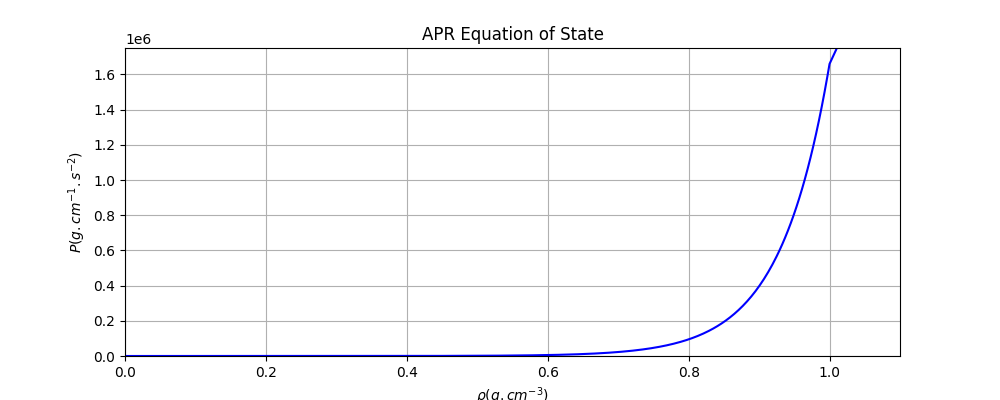

In [6]:
%matplotlib widget
apr_eos.plot_EoS(debug=True)

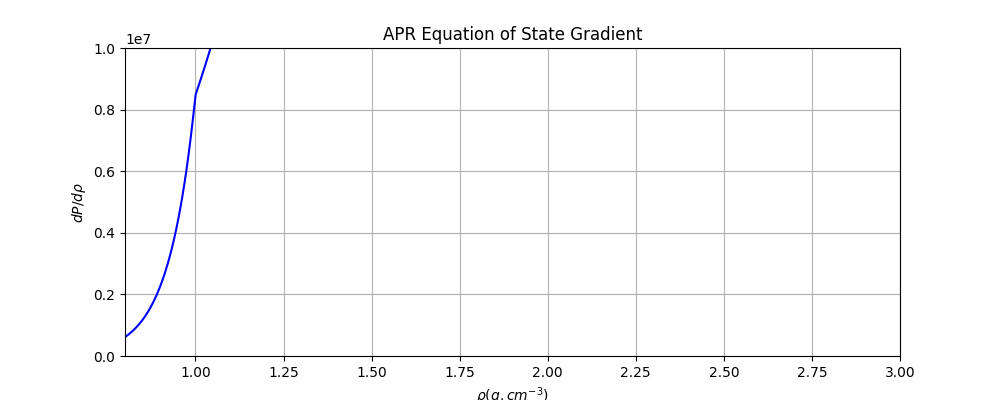

In [7]:
apr_eos.plot_dP_dRho(debug=True)

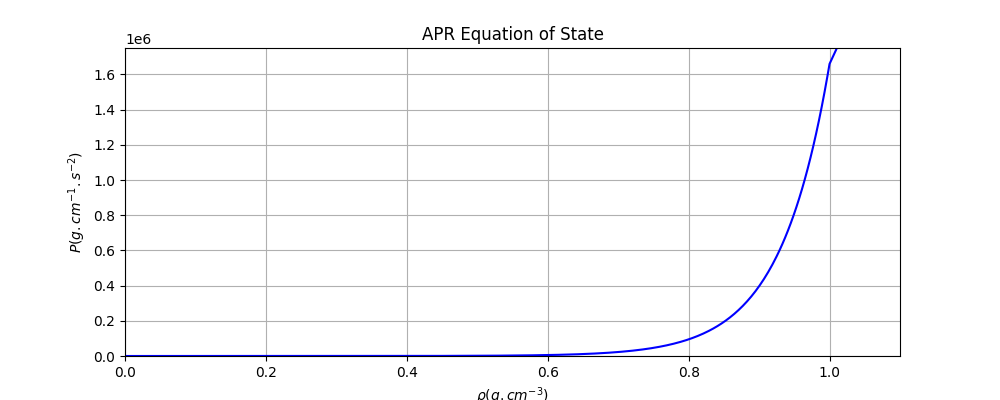

In [7]:
apr_eos.plot_EoS(debug=True)

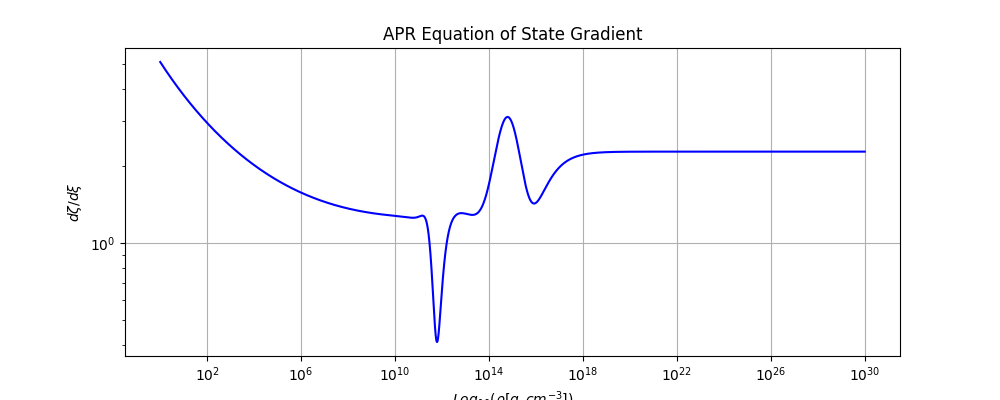

In [9]:
apr_eos.plot_dZeta_dXi()

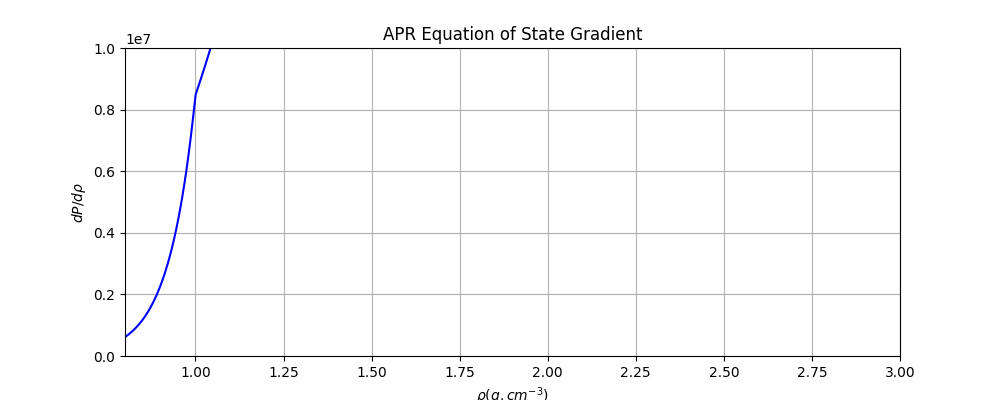

In [9]:
apr_eos.plot_dP_dRho(debug=True)

# 4) Formulate the Solver and test it

In [15]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_bvp
from EOS import NeutronStarEOS
from ode_system import *
from omars_little_helpers import *

In [16]:
apr_eos = NeutronStarEOS('APR')

In [26]:
# same function from ode_system but running it here for easy modification of
# boundary conditions to test and debug

def create_boundary_conditions(eos_class, rho_c, nu_c, lambda_c, a_c, ri):
    """Create a boundary conditions function with specific initial conditions."""
    
    P = eos_class.get_pressure(extrapolate=True)
    dPdrho = eos_class.dP_dRho() # need to make this method
    nu_initial = nu_c + (4 * G * np.pi * ri**2 * \
                            (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                            c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + \
                                3 * mu * P(rho_c))) / (3 * c**4 * mu)
    
    llambda_initial = lambda_c + (8 * G * np.pi * ri**2 * \
                 (fa**2 * ma**2 * mu + a_c * c**2 * fa * rho_c + c**2 * mu * rho_c -  \
                  fa**2 * ma**2 * mu * np.cos(a_c))) / (3 * c**4 * mu)
    
    rho_initial = rho_c - 1/(6 * mu * dPdrho(rho_c)) * ri**2 * (
        (4 * G * np.pi * rho_c * \
         (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) \
            / c**2 + (4 * G * np.pi * P(rho_c) * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                                           c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) / c**4 \
                                            + (c**2 * rho_c * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu - \
                                                  (3 * P(rho_c) * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu )
    a_initial_guess = a_c + (ri**2 * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / (6 * fa * mu)

    def boundary_conditions(ya, yb):
        return np.array([
            ya[1],                 #  ya[1] a_prime(ri) = 0
            yb[1]+9.3696e-10,                 #  yb[1] a_prime(rf) = 0
            ya[2] - nu_initial,    # nu(ri) = nu_initial
            ya[3] - llambda_initial, # lambda(ri) = lambda_initial
            ya[4] - rho_initial    # rho(ri) = rho_initial
        ])
    return boundary_conditions, a_initial_guess, nu_initial, llambda_initial, rho_initial


def bvp_ode_system(r, y, P, dPdRho):

    a, a_prime, nu, llambda, rho = y
    # switch the system when rho reaches 1
    # Debugging output
    #if np.any(rho <= 1):
    #    debug_info.append((r, rho))
    #   return np.zeros_like(y)
    
    
    # Metric Potential equation
    expression_for_metric_pot = -1/r + np.exp(llambda)/r + (8 * np.exp(llambda) * G * np.pi * r * P(rho))/c**4 - \
                                (8 * np.exp(llambda) * fa * G * np.pi * r * (-fa * ma**2 * mu * (-1 + np.cos(a)) + \
                                c**2 * a * rho))/(c**4 * mu) + \
                                (4 * fa**2 * G * np.pi * r * a_prime**2)/c**4
    #
    dnu_dr = expression_for_metric_pot

    # Mass equation
    expression_for_mass = 1/r - np.exp(llambda)/r + (8 * np.exp(llambda) * G * np.pi * r * rho)/c**2 + \
                          (8 * np.exp(llambda) * fa * G * np.pi * r * (-fa * ma**2 * mu * (-1 + np.cos(a)) + \
                          c**2 * a * rho))/(c**4 * mu) + \
                          (4 * fa**2 * G * np.pi * r * a_prime**2)/c**4
    #
    dllambda_dr = expression_for_mass

    # Klein-Gordon equation (second-order turned first-order)
    expression_for_KG = ma**2 * np.exp(llambda) * np.sin(a) + (c**2 * rho)/(mu*fa) * np.exp(llambda) + \
                        a_prime * (-2/r + 1/2  * dllambda_dr - 1/2  * dnu_dr)
    #
    da_prime_dr = expression_for_KG

    # TOV equation
    #expression_for_TOV =  -(fa / mu * a_prime * (3 * P(rho) - c**2 * rho ) + (P(rho) + c**2 * rho) * dnu_dr /2 ) / dPdRho(rho)
    expression_for_TOV = - (P(rho) + c**2 * rho) * dnu_dr / 2 # GR part
    expression_for_TOV -=  fa / mu * a_prime * (3 * P(rho) - c**2 * rho) # Axion part: change this for different theories
    expression_for_TOV /= dPdRho(rho) # used chain rule to take P'(r) to rho'(r)
    
    drho_dr = expression_for_TOV

    return np.array([a_prime, da_prime_dr, dnu_dr, dllambda_dr, drho_dr])

In [41]:
def create_boundary_conditions(eos_class, rho_c, nu_c, lambda_c, a_c, ri):
    """Create a boundary conditions function with specific initial conditions."""
    P = eos_class.get_pressure(extrapolate=True)
    dPdrho = eos_class.dP_dRho()
    nu_initial = nu_c + (4 * G * np.pi * ri**2 * \
                            (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                            c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + \
                                3 * mu * P(rho_c))) / (3 * c**4 * mu)
    
    llambda_initial = lambda_c + (8 * G * np.pi * ri**2 * \
                 (fa**2 * ma**2 * mu + a_c * c**2 * fa * rho_c + c**2 * mu * rho_c -  \
                  fa**2 * ma**2 * mu * np.cos(a_c))) / (3 * c**4 * mu)
    
    rho_initial = rho_c - 1/(6 * mu * dPdrho(rho_c)) * ri**2 * (
        (4 * G * np.pi * rho_c * \
         (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) \
            / c**2 + (4 * G * np.pi * P(rho_c) * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                                           c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) / c**4 \
                                            + (c**2 * rho_c * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu - \
                                                  (3 * P(rho_c) * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu )
    a_initial_guess = a_c + (ri**2 * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / (6 * fa * mu)
    #
    #
    # return the boundary condition function
    def boundary_conditions(ya, yb):
        return np.array([
            ya[1]  ,                 #  ya[1] a_prime(ri) = 0
            yb[0] + 7.6204e-03,                 #  yb[1] a_prime(rf) = 0
            ya[2] - nu_initial,    # nu(ri) = nu_initial
            ya[3] - llambda_initial, # lambda(ri) = lambda_initial
            ya[4] - rho_initial    # rho(ri) = rho_initial
        ])
    return boundary_conditions, a_initial_guess, nu_initial, llambda_initial, rho_initial

In [42]:
# Define the domain for rß
ri = 1e-15
rf = 1.13e6 # right below the expected radius to debug the code first
r_inside = create_r_mesh(ri,rf,5000)

rho_c = 1e15
boundary_conditions_func, a_initial, nu_initial, llambda_initial, rho_initial = create_boundary_conditions(eos_class=apr_eos,
    rho_c=rho_c,
    nu_c=1,
    lambda_c=0,
    a_c=-0.013889,
    ri=ri
)
print(boundary_conditions_func)
print(f"a_initial= {a_initial:0.2e}" )
print(f"nu_initial = {nu_initial:0.2e}")
print(f"llambda_initial= {llambda_initial:0.2e}")
print(f"rho_initial:{rho_initial:0.2e}")

<function create_boundary_conditions.<locals>.boundary_conditions at 0x132926d40>
a_initial= -1.39e-02
nu_initial = 1.00e+00
llambda_initial= 6.21e-43
rho_initial:1.00e+15


In [43]:
# Define the initial guess for the solution
y_initial = np.zeros((5, r_inside.size))  # Initialize the array with zeros

idx_1_km =  np.argmax(r_inside >= 1e5) # solution should increase around here
# set the first value of a(r) to ac
y_initial[0, :idx_1_km] = a_initial
# linearly interpolate the remaining values of a(r) from ac to final_value_a
y_initial[0, idx_1_km:] = np.linspace(a_initial, 0, len(y_initial[0,idx_1_km:]))
y_initial[1, :] = 0  # a_prime(r)
y_initial[2, :] = nu_initial  # nu(r)
y_initial[3, :] = llambda_initial  # llambda(r)
# rho should be constant for a long distance and then decreases right before the radius
y_initial[4, :14700] = rho_initial  # rho(r)
y_initial[4, 14700:14785] = np.logspace(np.log10(rho_initial), 0, len(y_initial[4,14700:14785]))
y_initial[4, 14785:] = 1e-10 # rho(r) 

In [44]:
# the system need to be wrapped since solve_bvp expects the ode
# function to be only function of (independent, dependent) variables
def class_ode_system_wrapper(r, y):
    ode_system = ode_class(P=apr_eos.get_pressure(extrapolate=True), dPdRho=apr_eos.dP_dRho())
    return ode_system.update(r,y)

In [45]:
def ode_system_wrapper(r, y):
    P=apr_eos.get_pressure(extrapolate=True)
    dPdRho=apr_eos.dP_dRho()
    return bvp_ode_system(r, y, P, dPdRho)

In [46]:
# Solve the BVP
sol = solve_bvp(ode_system_wrapper, boundary_conditions_func, r, y_initial, verbose=2, tol=2.22e-14)

# Process the solution
a = sol.sol(r)[0]
a_prime = sol.sol(r)[1]
nu = sol.sol(r)[2]
llambda = sol.sol(r)[3]
rho = sol.sol(r)[4]

# Check if the solution is successful and process it
if sol.success:
    print('Solution found!')
else:
    print("Solution was not successful.")

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  


ValueError: A value (-1756100151221.5625) in x_new is below the interpolation range's minimum value (0.0).

In [122]:
def plot_somethin(x, y, y_label, x_label=r'$r(km)$', y_scale=None, debug=False):
    plt.figure(figsize=(8, 4))
    plt.plot(x/1e5, y, color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if debug:
       plt.xlim(x[-700]/1e5,x[-1]/1e5)
       plt.ylim(0,1e4)
    else:
        plt.xscale('log')
    if y_scale=='log':
        plt.yscale('log')
    plt.axvline(x=1e6/1e5, linestyle='--', color='grey', linewidth=0.4,zorder=-1)
    
    return plt.show()

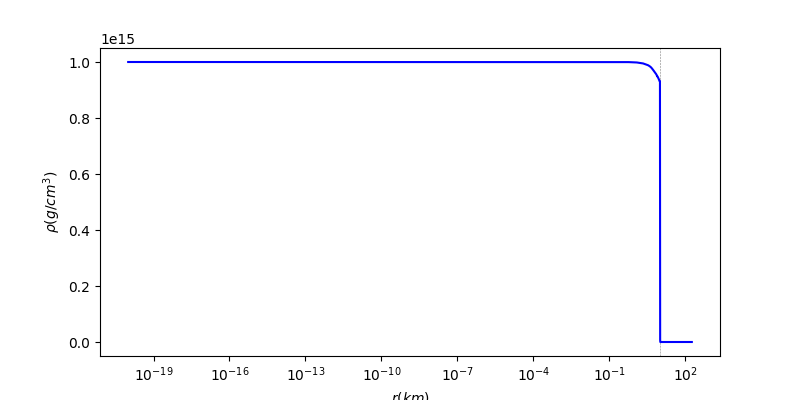

In [123]:
plot_somethin(r, rho, r"$\rho(g/cm^{3})$", x_label=r'$r(km)$')